In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('vehicles_us.csv')

In [3]:
df.head(10)

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

In [4]:
df

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color  is_4wd date_posted  days_listed  
0        automatic     SUV         NaN     1.0  2018-06-23           19  
1        automatic  pickup       white     1.0  2018-10-19           50  
2        automatic   sedan         red     NaN  2019-02-07           79  
3        automatic  pickup         NaN     NaN  2019-03-22            9  
4        automatic   sedan       black     NaN  2019-04-02           28  
...            ...     ...         ...     ...         ...          ...  
51520    automatic   sedan       black     NaN  2018-10-03           37  
51521    automatic   sedan       white     NaN  2018-11-14           22  
51522    automatic   sedan        blue     NaN  2018-11-15           32  
51523    automatic   sedan       black     NaN  2018-07-02           71  
51524    automatic   sedan         NaN     NaN  2018-06-05           10  

[51525 rows x 13 columns]

In [5]:
df.shape

(51525, 13)

Conclusions

Data on user behavior is stored in the file 'vehicles_us.csv.' There is no information about the quality of the data and all is loader n working fine.

In [6]:
#extracting the names of the manufacturer
split = df['model'].str.split(pat=' ', n=1, expand=True)


In [7]:
df.paint_color.fillna(value = 'no_info', inplace = True)

In [8]:
df['state'] = 'owned'
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  state  
0    automatic     SUV     no_info     1.0  2018-06-23           19  owned  
1    automatic  pickup       white     1.0  2018-10-19           50  owned  
2    automatic   sedan         red     NaN  2019-02-07           79  owned  
3    automatic  pickup     no_info     NaN  2019-03-22            9  owned  
4    automatic   sedan       black     NaN  2019-04-02           28  owned

In [9]:
df.is_4wd.fillna(0, inplace=True)

In [10]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  state  
0    automatic     SUV     no_info     1.0  2018-06-23           19  owned  
1    automatic  pickup       white     1.0  2018-10-19           50  owned  
2    automatic   sedan         red     0.0  2019-02-07           79  owned  
3    automatic  pickup     no_info     0.0  2019-03-22            9  owned  
4    automatic   sedan       black     0.0  2019-04-02           28  owned

In [11]:
df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'),inplace = True)

In [12]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  state  
0    automatic     SUV     no_info     1.0  2018-06-23           19  owned  
1    automatic  pickup       white     1.0  2018-10-19           50  owned  
2    automatic   sedan         red     0.0  2019-02-07           79  owned  
3    automatic  pickup     no_info     0.0  2019-03-22            9  owned  
4    automatic   sedan       black     0.0  2019-04-02           28  owned

In [13]:
df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('mean'),inplace = True)
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2011.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV     no_info     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     0.0  2019-02-07   
3  162071.751024    automatic  pickup     no_info     0.0  2019-03-22   
4   80903.000000    automatic   sedan       black     0.0  2019-04-02   

   days_listed  state  
0           19  owned  
1           50  owned  
2           79  owned  
3            9  owned  
4           28  owned

In [14]:
df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'),inplace = True)
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2011.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV     no_info     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     0.0  2019-02-07   
3  162071.751024    automatic  pickup     no_info     0.0  2019-03-22   
4   80903.000000    automatic   sedan       black     0.0  2019-04-02   

   days_listed  state  
0           19  owned  
1           50  owned  
2           79  owned  
3            9  owned  
4           28  owned

In [15]:
# Removing duplicate 
df.drop_duplicates()

price  model_year           model  condition  cylinders fuel  \
0       9400      2011.0          bmw x5       good        6.0  gas   
1      25500      2011.0      ford f-150       good        6.0  gas   
2       5500      2013.0  hyundai sonata   like new        4.0  gas   
3       1500      2003.0      ford f-150       fair        8.0  gas   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   
...      ...         ...             ...        ...        ...  ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   
51521   2700      2002.0     honda civic    salvage        4.0  gas   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas   
51523   7455      2013.0  toyota corolla       good        4.0  gas   
51524   6300      2014.0   nissan altima       good        4.0  gas   

            odometer transmission    type paint_color  is_4wd date_posted  \
0      145000.000000    automatic     SUV     no_info     1.0  2018-06-23   
1       88705.000000    automatic  pickup       white     1.0  2018-10-19   
2      110000.000000    automatic   sedan         red     0.0  2019-02-07   
3      162071.751024    automatic  pickup     no_info     0.0  2019-03-22   
4       80903.000000    automatic   sedan       black     0.0  2019-04-02   
...              ...          ...     ...         ...     ...         ...   
51520   88136.000000    automatic   sedan       black     0.0  2018-10-03   
51521  181500.000000    automatic   sedan       white     0.0  2018-11-14   
51522  128000.000000    automatic   sedan        blue     0.0  2018-11-15   
51523  139573.000000    automatic   sedan       black     0.0  2018-07-02   
51524   93648.703319    automatic   sedan     no_info     0.0  2018-06-05   

       days_listed  state  
0               19  owned  
1               50  owned  
2               79  owned  
3                9  owned  
4               28  owned  
...            ...    ...  
51520           37  owned  
51521           22  owned  
51522           32  owned  
51523           71  owned  
51524           10  owned  

[51525 rows x 14 columns]

In [16]:
df. describe()

price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  51525.000000  51525.000000   51524.000000  51525.000000   
mean    12132.464920   2009.793954      6.121067  115537.986912      0.496303   
std     10040.803015      6.099296      1.657457   61872.130623      0.499991   
min         1.000000   1908.000000      3.000000       0.000000      0.000000   
25%      5000.000000   2007.000000      4.000000   73500.000000      0.000000   
50%      9000.000000   2011.000000      6.000000  114082.500000      0.000000   
75%     16839.000000   2014.000000      8.000000  152011.719127      1.000000   
max    375000.000000   2019.000000     12.000000  990000.000000      1.000000   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [17]:
df.head()

price  model_year           model  condition  cylinders fuel  \
0   9400      2011.0          bmw x5       good        6.0  gas   
1  25500      2011.0      ford f-150       good        6.0  gas   
2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3   1500      2003.0      ford f-150       fair        8.0  gas   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV     no_info     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.000000    automatic   sedan         red     0.0  2019-02-07   
3  162071.751024    automatic  pickup     no_info     0.0  2019-03-22   
4   80903.000000    automatic   sedan       black     0.0  2019-04-02   

   days_listed  state  
0           19  owned  
1           50  owned  
2           79  owned  
3            9  owned  
4           28  owned

In [18]:
#creating header with an option to filter the data and the checkbox:
#dataset includes mainly used cars, but there are several new options as well
#let users decide whether they want to see new cars from dealers or not) 

st.header('Market of used cars. Original data')
st.write("""
##### Filter the data below to see the ads by model
""")
show_new_cars = st.checkbox('Include new cars from dealers')

2023-03-05 14:15:16.873 
  command:

    streamlit run c:\Users\Rah\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [19]:
show_new_cars 

False

In [20]:
if not show_new_cars:
    df = df[df.condition!='new']

In [21]:
#creating options for filter  from all manufacturers and different years
model_choice = df['model'].unique()
make_choice_man = st.selectbox('Select model:', model_choice)

In [22]:
make_choice_man 


'bmw x5'

In [23]:
#next let's create a slider for years, so that users can filter cars by model yearsb
#creating min and max years as limits for sliders
min_year, max_year=int(df['model_year'].min()), int(df['model_year'].max())

#creating slider 
year_range = st.slider(
     "Choose years",
     value=(min_year,max_year),min_value=min_year,max_value=max_year )

In [24]:
year_range

(1908, 2019)

In [25]:
#creating actual range  based on slider that will be used to filter in the dataset
actual_range=list(range(year_range[0],year_range[1]+1))

In [26]:
#filtering dataset on chosen model and chosen year range
filtered_type=df[(df.model==make_choice_man) & (df.model_year.isin(list(actual_range)))]

#showing the final table in streamlit
st.table(filtered_type)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [27]:
df['manufacturer'] = split[0]
df['model_name'] = split[1]
df.drop('model', axis=1, inplace=True)
df.head(10)

C:\Users\Rah\AppData\Local\Temp\ipykernel_16848\4054170794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturer'] = split[0]
C:\Users\Rah\AppData\Local\Temp\ipykernel_16848\4054170794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = split[1]
C:\Users\Rah\AppData\Local\Temp\ipykernel_16848\4054170794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

price  model_year  condition  cylinders fuel       odometer transmission  \
0   9400      2011.0       good        6.0  gas  145000.000000    automatic   
1  25500      2011.0       good        6.0  gas   88705.000000    automatic   
2   5500      2013.0   like new        4.0  gas  110000.000000    automatic   
3   1500      2003.0       fair        8.0  gas  162071.751024    automatic   
4  14900      2017.0  excellent        4.0  gas   80903.000000    automatic   
5  14990      2014.0  excellent        6.0  gas   57954.000000    automatic   
6  12990      2015.0  excellent        4.0  gas   79212.000000    automatic   
7  15990      2013.0  excellent        6.0  gas  109473.000000    automatic   
8  11500      2012.0  excellent        4.0  gas  104174.000000    automatic   
9   9200      2008.0  excellent        6.0  gas  147191.000000    automatic   

     type paint_color  is_4wd date_posted  days_listed  state manufacturer  \
0     SUV     no_info     1.0  2018-06-23           19  owned          bmw   
1  pickup       white     1.0  2018-10-19           50  owned         ford   
2   sedan         red     0.0  2019-02-07           79  owned      hyundai   
3  pickup     no_info     0.0  2019-03-22            9  owned         ford   
4   sedan       black     0.0  2019-04-02           28  owned     chrysler   
5   sedan       black     1.0  2018-06-20           15  owned     chrysler   
6   sedan       white     0.0  2018-12-27           73  owned       toyota   
7     SUV       black     1.0  2019-01-07           68  owned        honda   
8     SUV     no_info     1.0  2018-07-16           19  owned          kia   
9     SUV        blue     1.0  2019-02-15           17  owned        honda   

  model_name  
0         x5  
1      f-150  
2     sonata  
3      f-150  
4        200  
5        300  
6      camry  
7      pilot  
8    sorento  
9      pilot

In [28]:
df

price  model_year  condition  cylinders fuel       odometer  \
0       9400      2011.0       good        6.0  gas  145000.000000   
1      25500      2011.0       good        6.0  gas   88705.000000   
2       5500      2013.0   like new        4.0  gas  110000.000000   
3       1500      2003.0       fair        8.0  gas  162071.751024   
4      14900      2017.0  excellent        4.0  gas   80903.000000   
...      ...         ...        ...        ...  ...            ...   
51520   9249      2013.0   like new        6.0  gas   88136.000000   
51521   2700      2002.0    salvage        4.0  gas  181500.000000   
51522   3950      2009.0  excellent        4.0  gas  128000.000000   
51523   7455      2013.0       good        4.0  gas  139573.000000   
51524   6300      2014.0       good        4.0  gas   93648.703319   

      transmission    type paint_color  is_4wd date_posted  days_listed  \
0        automatic     SUV     no_info     1.0  2018-06-23           19   
1        automatic  pickup       white     1.0  2018-10-19           50   
2        automatic   sedan         red     0.0  2019-02-07           79   
3        automatic  pickup     no_info     0.0  2019-03-22            9   
4        automatic   sedan       black     0.0  2019-04-02           28   
...            ...     ...         ...     ...         ...          ...   
51520    automatic   sedan       black     0.0  2018-10-03           37   
51521    automatic   sedan       white     0.0  2018-11-14           22   
51522    automatic   sedan        blue     0.0  2018-11-15           32   
51523    automatic   sedan       black     0.0  2018-07-02           71   
51524    automatic   sedan     no_info     0.0  2018-06-05           10   

       state manufacturer model_name  
0      owned          bmw         x5  
1      owned         ford      f-150  
2      owned      hyundai     sonata  
3      owned         ford      f-150  
4      owned     chrysler        200  
...      ...          ...        ...  
51520  owned       nissan     maxima  
51521  owned        honda      civic  
51522  owned      hyundai     sonata  
51523  owned       toyota    corolla  
51524  owned       nissan     altima  

[51382 rows x 15 columns]

In [29]:
st.header('Compare days listed between manufacturers')
list_for_hist = df['manufacturer'].unique()
selection1 = st.selectbox('manufacturer 1', list_for_hist )
selection2 = st.selectbox('manufacturer 2', list_for_hist )
df_filtered = df[(df['manufacturer'] == selection1) | (df['manufacturer'] == selection2)]
fig = px.histogram(df_filtered , x='days_listed', color = 'manufacturer')

# display the figure with streamlit
st.write(fig)

Conclusions

Here, all the necessaries duplicates has been checked and some corrections done apprepraite.  As well as missing number too has been checked and resolved too.
 One more column was added to the dataset which is State and st.hearder and st.selectbox was also introduce in this section.

In [30]:
st.header('Price analysis')
st.write("""
###### Let's analyze what influences price the most. We will check how distibution of price varies depending on 
transmission, fuel or type and condition
""")



# Will create histograms with the split by parameter of choice: paint_color, transmission, type, conditon

#creating list of options to choose from
list_for_hist=['transmission','fuel','type','condition', 'model']

#creating selectbox
choice_for_hist = st.selectbox('Split for price distribution', list_for_hist)

#plotly histogram, where price is split by the choice made in the selectbox
fig1 = px.histogram(df, x="price", color=choice_for_hist)

#adding tittle
fig1.update_layout(
title="<b> Split of price by {}</b>".format(choice_for_hist))

#embedding into streamlit
st.plotly_chart(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [31]:
fig1.show()

In [32]:
# creating age category of cars, cause we want to take it into account when analyze the price
df['age']=2022-df['model_year']

def age_category(x):
    if x<5: return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'

df['age_category']=  df['age'].apply(age_category)    

C:\Users\Rah\AppData\Local\Temp\ipykernel_16848\573827897.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rah\AppData\Local\Temp\ipykernel_16848\573827897.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df['age_category']

0        10-20
1        10-20
2         5-10
3        10-20
4         5-10
         ...  
51520     5-10
51521      >20
51522    10-20
51523     5-10
51524     5-10
Name: age_category, Length: 51382, dtype: object

In [34]:
st.header('manufacturer production and model production analysis')
st.write(""""
###### let's analyse what influence manufacturer production and model year. we will check how distribution of model
production varies depending on model,condition,cylinder,model_year,state
""")

import plotly.express as px

#creating list of options to choose from
list_for_scatter = ['manufacturer','cylinder','model_year','state']

choice_for_scatter = st.selectbox('split for model_year production', list_for_scatter)

choice_for_scatter = st.selectbox('split for manufacturer production', list_for_scatter)

#Plotly histogram
fig2 = px.scatter(df, x = 'odometer', color = choice_for_scatter)

fig2.update_layout(
title = '<b> Comparing the model and year the cars were produced by {}</b>'. format(choice_for_scatter))

st.plotly_chart(fig2)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [35]:
fig2.show()

Again this scatter graph, it introduce us to model production and year model analysis in the dataset. Which With the help of the filters, we can check how distribution of model production varies depending on condition, odometer, type, state and same applys to year model production.

Starting with condition in both production. In this stage we can see how the graph move or change due to the distribution concren with the production and also all colors apply to it also.

Here all the stages of the conditions where apply to it, we have all the model cars at the side of the graph And it all change accordingly to the stage of the condition.

In [36]:
st.header('Analysis type production and 4wd production')
st.write(""""
###### let's analyse what influence type production and 4wd production. we will check how distribution of how the two 
prodtction varies depending on manufacturer,type,fuel,is_4wd,condition
""")

import plotly.express as px

#creating list of options to choose from
list_for_bar = ['manufacturer','type','fuel','is_4wd','condition']

choice_for_bar = st.selectbox('split for type production', list_for_bar)

choice_for_bar = st.selectbox('split for is_4wd production', list_for_bar)


#Plotly histogram
fig3 = px.bar(df, x = 'condition', color = choice_for_bar)

fig3.update_layout(
title = '<b> Comparing type and 4wd cars production  by {}</b>'. format(choice_for_bar))

st.plotly_chart (fig3)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [37]:
fig3.show()

This histogram graph, compare the type production and 4wd production in this work.

Starting with type in both production. In this stage we can see how the graph move or change due to the distribution concren with the production and also all colors apply to it also.

Here all the stages of the conditions where apply to it, we have all the model cars at the side of the graph. And it all change accordingly to the stage of the condition.

In [38]:
st.header('Comparing the use of fuel of the Product')
st.write(""""
###### let's analyse the use of fuel of the Product. we will check for the prodct that uses more fuel in working depending on 
model,transmission,cylinders,type
""")

import plotly.express as px

#creating list of options to choose from
list = ['manufacturer','transmission','cylinders','type']

choice = st.selectbox('split for fuel',list)


choice = st.selectbox('split for condition',list)


#Plotly histogram
fig4 = px.histogram(df,x='fuel',color=choice)

fig4.update_layout(
title = "<b>Comparing the use of fuel".format(list))

st.plotly_chart(fig4)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [39]:
fig4.show()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'model_year'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'is_4wd'}>,
        <AxesSubplot:title={'center':'days_listed'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

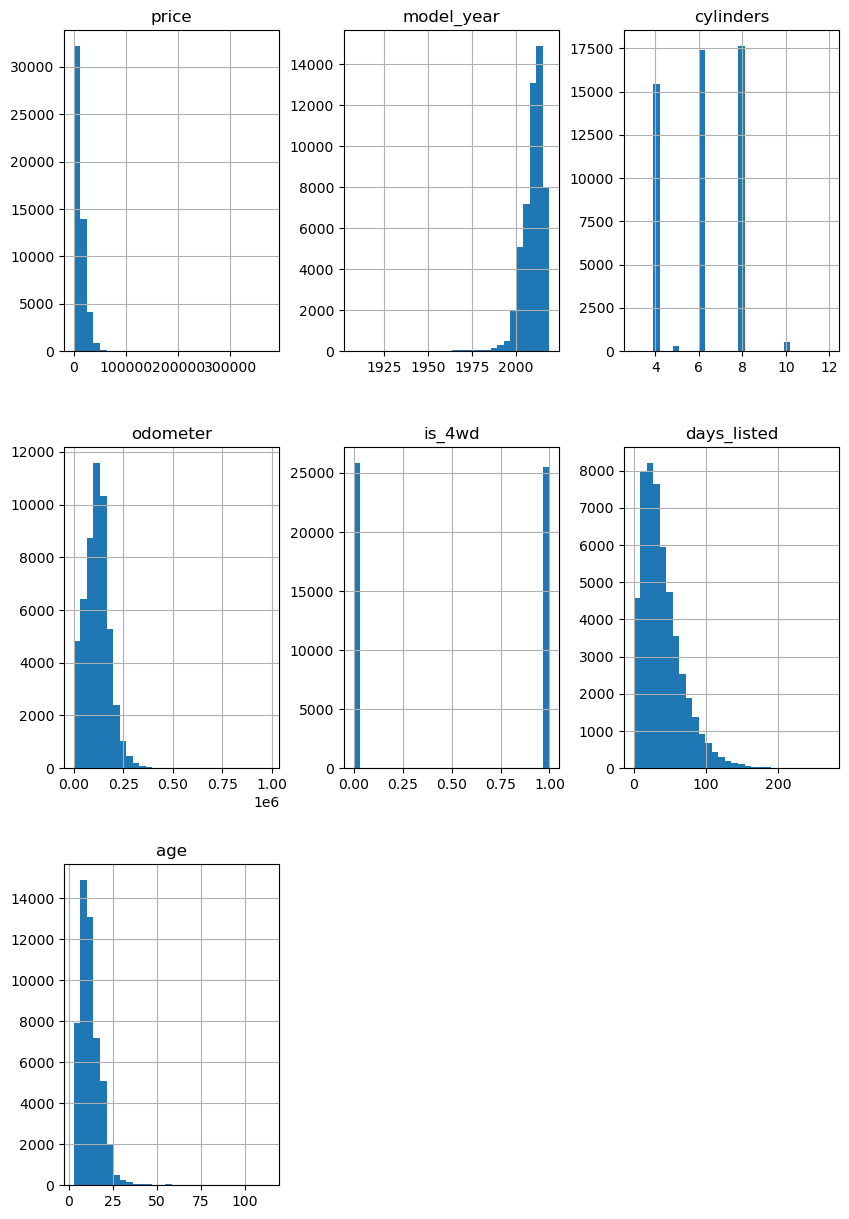

In [40]:
# Plot a histogram of the numerical columns
df.hist(bins=30, figsize=(10,15))

In [41]:
# histogram of the price column
px.histogram(df, x='price', nbins=50)

In [42]:
#scatterplot of price vs odometer
px.scatter(df, x='odometer', y='price', color='fuel')

In [43]:
#scatterplot of price vs model_year
px.scatter(df, x='model_year', y='price', color='fuel')

This bar chart graph, Comparing the use of fuel of the Product in the dataset. Which With the help of the filters, we can check how distribution of fuel production varies depending on prodtuct.

Starting with transmission. In this stage we can see how the graph move or change due to the distribution concren with the type and the year of production and also all colors filter apply to it also.

Here the bar chart made it little bit differen in a way also clearer as well and self explained in a way. And also the demand and the production moved hand in hand, like they say in economic. That if more is demand then more is produced.

Final Conclusions

We created a streamlit wab page using the above dataset provider, that a company can use to keep track of his production. Business owners are divided into salesmen and managers. Salesmen and managers work on departments. A salesman's manager is predetermined by on which department he or she works on.

In our case we have created the wab page according to the dataset for everyone who wishes to enhance his business or as a customer who want to buy a car can use this page to study the market before he or she decide on to do. Any car dealer or customer who will choice the page will find it easier to make the right choice in buying or selling.

This Streamlit project was divided into three part and the first talks about dataset installation and abd data review.

The second part brings out the dataset cleaning and making sure all is good for work and to work with.

And lastly the graphs in the work was introduced in this last part and also well explained and why it enter changes by your command. In all i will say it a go experiences for me to do something like this with the help of practicum, am glady and confidence too in working as a data scientists.